****************
# <font color = 'green'> <p style='text-align: center;'> HELP International - Priority Country List for Humanitarian Aid </p>


### <font color = 'purple'> <p style='text-align: center;'> By - Nitanshu Joshi </p>
*************************

### <font color='red'> Business Understanding </font>

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programs, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

### <font color='red'> Business Objective </font>
And this is where you come in as a data analyst. Your job is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

### <font color='red'> Data Dictionary

| Column Name |   Description  |
| :- | :------------- |
| **country** |	Name of the country |
| **child_mort** | Death of children under 5 years of age per 1000 live births |
| **exports** | Exports of goods and services per capita. Given as %age of the GDP per capita |
| **health** | Total health spending per capita. Given as %age of GDP per capita |
| **imports** | Imports of goods and services per capita. Given as %age of the GDP per capita |
| **Income** | Net income per person|
| **Inflation** | measurement of the annual growth rate of the GDP deflator |
| **life_expec** | The average number of years a new born child would live if the current mortality patterns are to remain the same |
| **total_fer** | The number of children that would be born to each woman if the current age-fertility rates remain the same. |
| **gdpp** | The GDP per capita. Calculated as the Total GDP divided by the total population. |


In [89]:
# Steps that I will use for this assignment
# =========================================
# 1- Reading and getting basic understanding of the Data
# 2- Data Quality Check & EDA
# 3- Outlier Analysis
# 4- Checking Cluster Tendency (Hopkin's Test)
# 5- Data Preparation for Modelling - Re-scaling [Standard Scaling]
# 6- Choosing the Best value of K
#     a. SSD
#     b. Silhouette's Analysis
# 7- Model Building
#    a. K-Means Clustering Model
#        i. Make the Model
#        ii. Visualize the clusters using scatter plot and boxplots
#        iii. Perform Cluster Profiling (gdpp, child_mort, income)
#    b. Hierarchical Clustering Model
#        i. Make the model
#        ii. Single Linkage with Dendrogram
#        iii. Complete Linkage with Dendrogram
#        iv. Use suitable method and perform the final cut.
#        v. Visualize the clusters using scatter plot and boxplots.
#       vi. Perform Cluster Profiling (gdpp, child_mort, income)
# 8- Using both the results and reporting countries that are in need of the aid.

In [1]:
# Importing the libraries
# -----------------------
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# Importing Warnings
import warnings
warnings.filterwarnings('ignore')


# Setting the maximum number of rows to display to 200
# ----------------------------------------------------
pd.options.display.max_rows = 200

**************
## <font color='blue'> Step 1 - Reading and Understanding the Data
**************

In [2]:
# Reading the Dataset
# -------------------
df = pd.read_csv('Country-data.csv')

# Looking at the Data
# -------------------
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Cheking the dimensions of the dataset
# -------------------------------------
df.shape

(167, 10)

In [4]:
# We observe that we are dealing with the data for 167 countries.

In [5]:
# Checking the datatype of columns in the dataset
# -------------------------------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# We observe that all columns except the country column (country name) are numeric.

********************
##  <font color='blue'> Step 2 - Exploratory Data Analysis and Data Quality Check
********************

### <font color='magenta'>2.1) - Data Cleaning and Transformation

In [7]:
# Checking for NULL values
# ------------------------
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# We see that there are no NULL values present in the form of NA.

In [9]:
# Removing non-numerical column
# -----------------------------
# If want to perform clustering, we need to remove the non-numerical column - 'country'.
# Here we can transform this column into an index column, 
# but before that we need to check the uniquness of that column.

print("Number of unique values in the 'country' column : ", df['country'].nunique())

Number of unique values in the 'country' column :  167


In [10]:
# Since we see that number of unique columns in the country column is same as the number of columns.
# Thus we can convert 'country' columns as index.

df.set_index('country',inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
# Now we don't have any non-numerical column in our data.

In [12]:
# Transforming the exports, health and imports column into a suitable format
# --------------------------------------------------------------------------
# While reading the data description we found out that - 
#
# - exports --> Exports of goods and services per capita. Given as %age of the GDP per capita
# - health ---> Total health spending per capita. Given as %age of GDP per capita
# - imports --> Imports of goods and services per capita. Given as %age of the GDP per capita
#
# We saw that all above 3 columns are given as a percent of the GDP per capita column (gdpp)
# Thus, we need to convert these columns in the form of per-capita.

# Converting exports - 
df.exports = (df['exports']/100) * df['gdpp']

# Converting health - 
df.health = (df['health']/100) * df['gdpp']

# Converting imports - 
df.imports = (df['imports']/100) * df['gdpp']

df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
# Now we have the columns - 'imports', 'exports' and 'health' as a form of per capita.

In [14]:
# Looking at the data we see that no more transformation is required for the data as of now.

### <font color='magenta'> 2.2) - Data Visualization

				 Dist Plots for all the columns of the Dataset


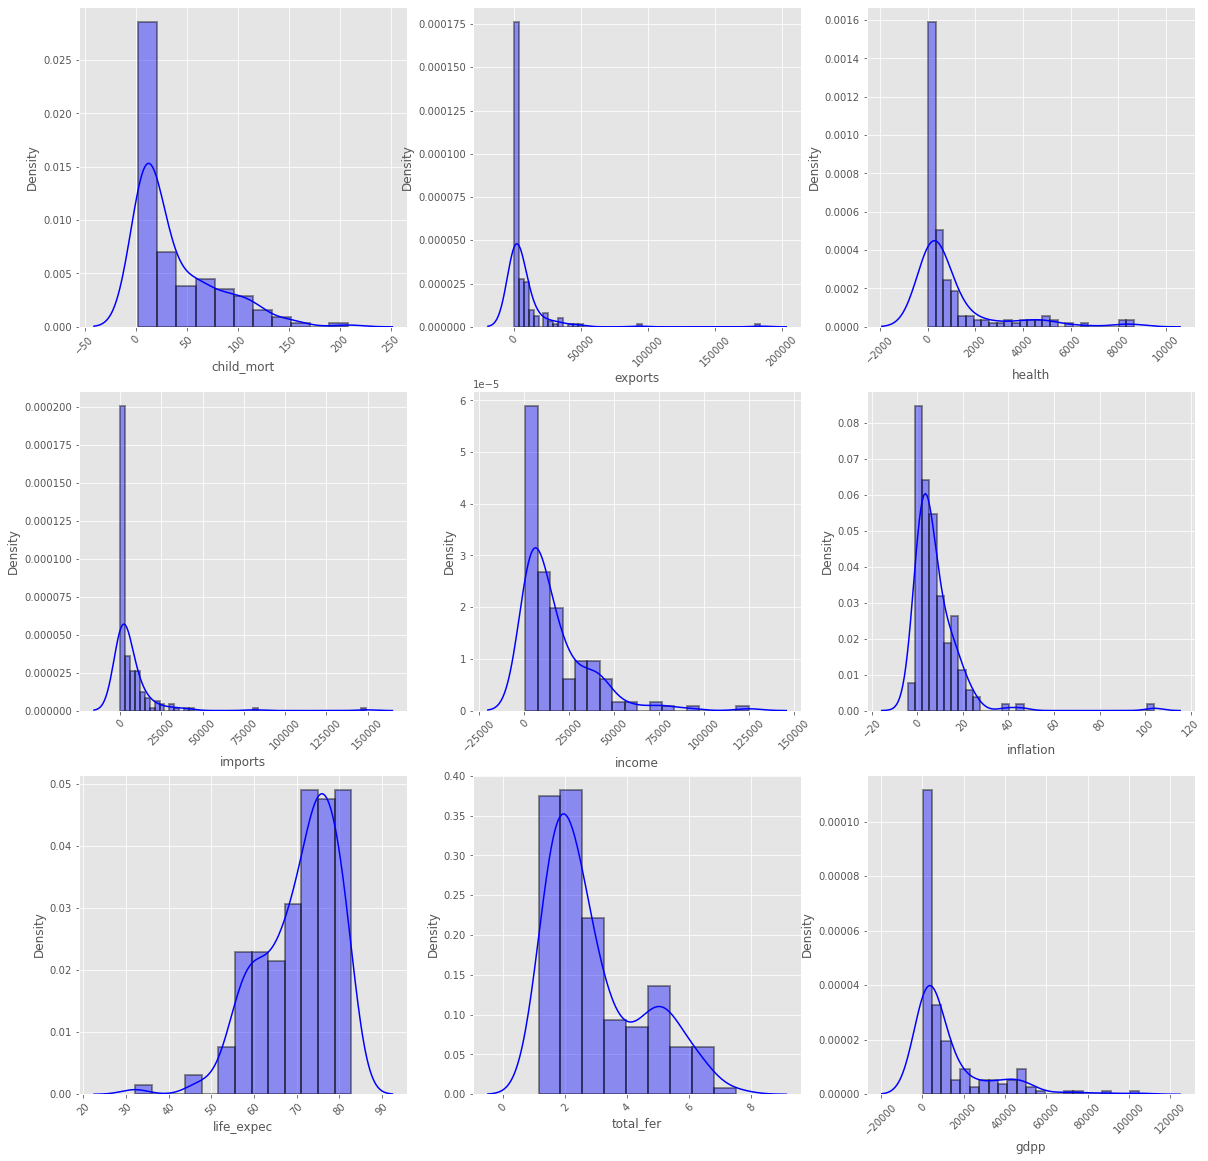

In [15]:
# ---------------------------------------------------
# -------------- Univariate Analysis ----------------
# ---------------------------------------------------
# Plotting the DISTPLOT for all the columns
# -----------------------------------------
plt.figure(figsize = (20,20))
plt.style.use('ggplot')
print("\t\t\t\t Dist Plots for all the columns of the Dataset")
for i in enumerate(df.columns):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]],
                 color='blue', 
                 hist_kws=dict(edgecolor="black", linewidth=2))
    
    plt.xticks(rotation=45)

In [16]:
# Observations from Distplot
# --------------------------
# We see that all the variables except life_expec shows right-skewed behavior on the distplot. 
# life_expec on the other hand shows left-skewed behavior.
#   It can be inferred that life expectancy is high for most of the countries.
# Also, the other remaining columns - 'income', 'total_fer', 'gdpp', 'child_mort', 'inflation', 'imports', 'exports'
#    and 'health' gives an inference that most of the countries have low values of the these.

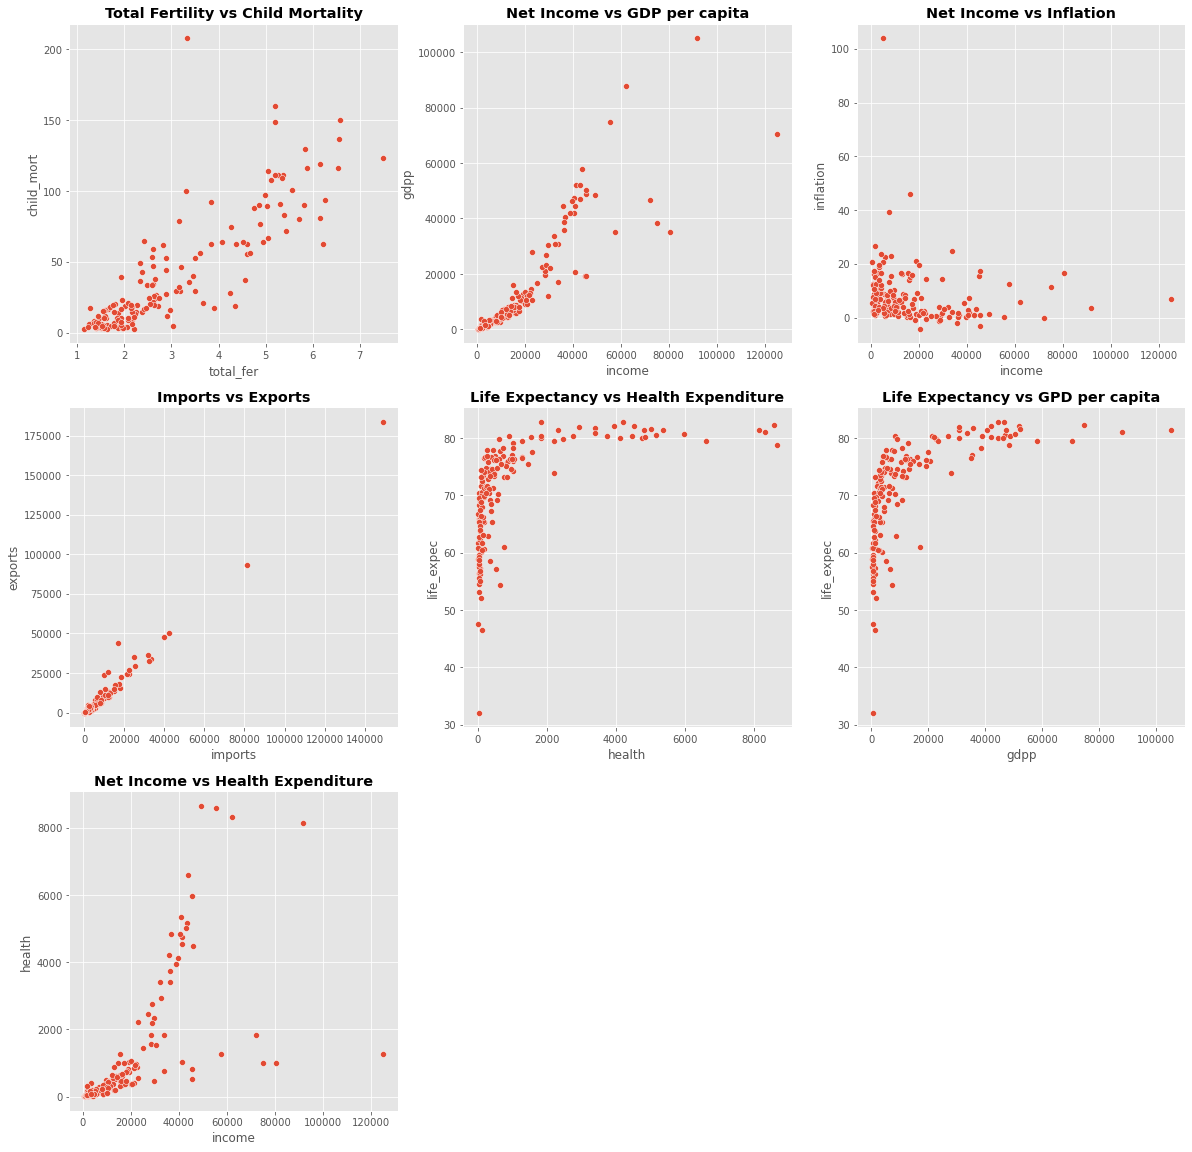

In [17]:
# ---------------------------------------------------
# -------------- Bivariate Analysis -----------------
# ---------------------------------------------------

# Scatter plots between various variables
# =======================================
plt.figure(figsize=(20,20))
plt.style.use('ggplot')

# Plot 1 - Plot between total fertility and child mortality
# ---------------------------------------------------------
plt.subplot(3,3,1)
sns.scatterplot(x='total_fer', y='child_mort', data=df)
plt.title('Total Fertility vs Child Mortality',fontweight="bold")

# Plot 2 - Plot between Net Income and GDP per capita
# ---------------------------------------------------
plt.subplot(3,3,2)
sns.scatterplot(x='income', y='gdpp', data=df)
plt.title('Net Income vs GDP per capita',fontweight="bold")

# Plot 3 - Plot between Net Income and GDP per capita
# ---------------------------------------------------
plt.subplot(3,3,3)
sns.scatterplot(x='income', y='inflation', data=df)
plt.title('Net Income vs Inflation',fontweight="bold")

# Plot 4 - Plot between Imports and Exports
# -----------------------------------------
plt.subplot(3,3,4)
sns.scatterplot(x='imports', y='exports', data=df)
plt.title('Imports vs Exports',fontweight="bold")

# Plot 5 - Plot between Life Expectancy and Health Expenditure
# ------------------------------------------------------------
plt.subplot(3,3,5)
sns.scatterplot(x='health', y='life_expec', data=df)
plt.title('Life Expectancy vs Health Expenditure',fontweight="bold")

# Plot 6 - Plot between Life Expectancy and GPD per capita
# --------------------------------------------------------
plt.subplot(3,3,6)
sns.scatterplot(x='gdpp', y='life_expec', data=df)
plt.title('Life Expectancy vs GPD per capita',fontweight="bold")

# Plot 7 - Plot between Net Income and Health Expenditure
# -------------------------------------------------------
plt.subplot(3,3,7)
sns.scatterplot(x='income', y='health', data=df)
plt.title('Net Income vs Health Expenditure',fontweight="bold")

plt.show()

In [18]:
# Observations and Inferences
# ---------------------------
#- Total Fertility vs Child Mortality
#   We see that the relationship follows a near linear relationship. We see that as the Total Fertiliy rates for a 
#   country increases, the child mortality rates also increases.
#
#- Income vs GDPP
#   This also follows a linear trend. We can say that a country with high GDPP will also have a higher Net income.
#
#- Income vs Inflation
#   We don't observe a linear relationship between income and inflation. 
# 
#- Import vs Exports
#   Import and exports shows a strong linear relationship. We can say that higher the number of imports, higher
#   will be the number of exports for a country.
# 
#- Life Expectancy vs Health Expenditure
#   We cannot observe a linear pattern between them. But we can say that if the health expenditure increases, 
#   there is a high chance of life expectancy increasing too.
# 
#- Life Expectancy vs GDPP
#   It is similar to the previous case. We cannot observe a linear pattern between them. 
#   But we can say that if the gdpp increases, there is a high chance of life expectancy increasing too.
#
#- Income vs Health Expenditure
#   We can say that countries with high income tend to spend more on health expenditure.
#

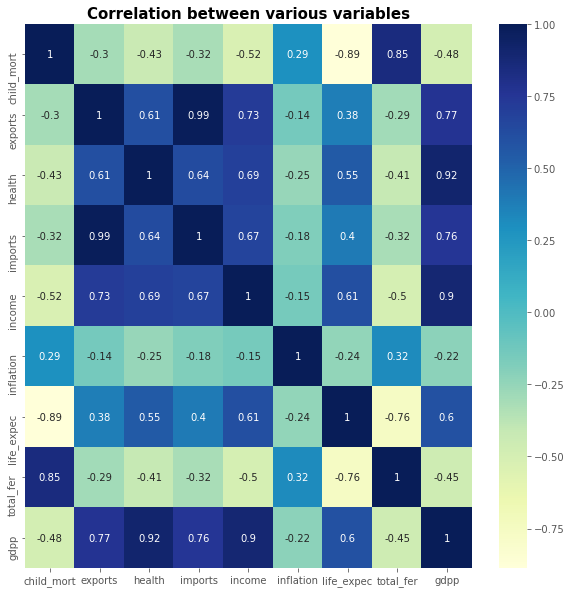

In [19]:
# Looking the correlation between various variables
# ==================================================

# Heatmap for Numerical columns
# -----------------------------
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation between various variables',fontsize=15,fontweight="bold")
plt.show()

In [20]:
# OBSERVATIONS & INFERENCES
# =========================
# We observe that there is pretty high positive or negative correlation between most of the variables.
# But, since Clustering is not affected much by collinearity, 
#  thus we will ignore the collinearity between the variables for this case.
# Hence no change or treatment of data is required here.

*****************
##  <font color='blue'> Step 3 - Outlier Analysis & Treatment
*****************

In [21]:
# Describing the columns of the dataset
# -------------------------------------
df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.97, 0.98, 0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


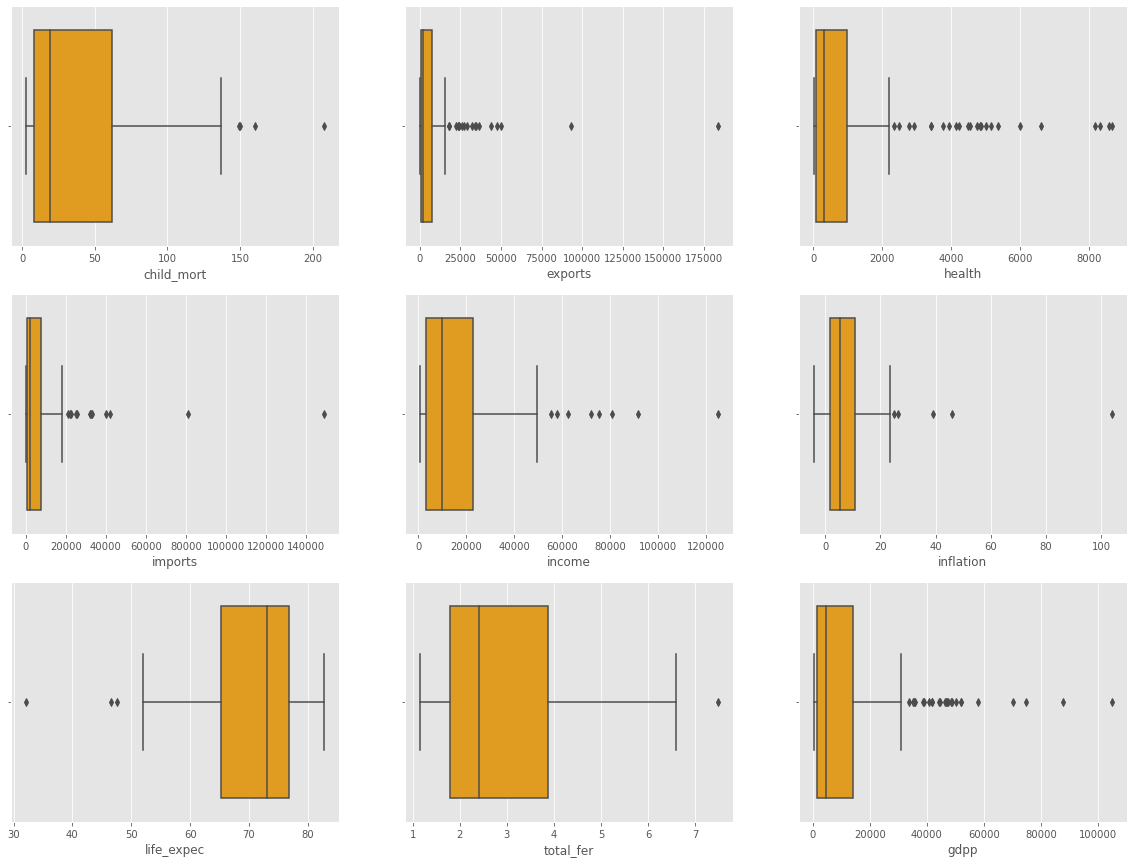

In [22]:
# ---------------------------------------------------
# -------------- Univariate Analysis ----------------
# ---------------------------------------------------

# BOX-PLOTS for all the variables
# -------------------------------
# To plot the box plot for all the columns
plt.figure(figsize = (20,15))
plt.style.use('ggplot')
for i in enumerate(df):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =df, orient='h', color='orange')
    plt.show


In [23]:
# Observations - 
# ------------
# - Columns - child_mortality, exports, imports,inflation , income, gdpp and health spending 
#              have some upper range outliers.
# 
# - Column - life_expentancy has a some lower range outliers
#

In [24]:
# Outlier Analysis:
# -----------------
# >> For columns such as child_mort, inflation, total_fer 
#    we will not do anything to the upper range outliers 
#    but we will deal with the lower range outlier(capping).

# >> But for rest of the columns, we will not do anything for the lower range outliers 
#    but we will deal with the upper range outliers(capping).
#

In [25]:
# Outlier Treatment:
# -----------------
# -> For child_mort, inflation, total_fer, life_expec ==> We will leave the outliers as it is.
#
# -> For gdpp, income, imports, exports, health ==> We will capp the above 99% of values
#
# Capping Treatment for outliers
# ------------------------------
# Column - gdpp
per99 = df['gdpp'].quantile(0.99)
df_countries = df[df['gdpp']<per99]

# Column - income
per99 = df_countries['income'].quantile(0.99)
df_countries = df_countries[df_countries['income']<per99]

# Column - exports
per99 = df_countries['exports'].quantile(0.99)
df_countries = df_countries[df_countries['exports']<per99]

# Column - imports
per99 = df_countries['imports'].quantile(0.99)
df_countries = df_countries[df_countries['imports']<per99]

# Column - health
per99 = df_countries['health'].quantile(0.99)
df_countries = df_countries[df_countries['health']<per99]

In [26]:
df_countries.shape

(157, 9)

In [27]:
df_countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [28]:
# We see that after outlier treatment, 10 countries have been removed.
# Hence we are done with outlier analysis and treatment.
#
# Since we are capping only removes top 1 percentile values, 
# so we can say that data and our analysis wont be affected.
#  

*******************
## <font color='blue'> Step 4 - Checking Cluster Tendency (Hopkin's Statistic Test)
*******************

In [29]:
# We have an option for checking this before re-scaling or after re-scaling.

# In this case we will use it Before Re-Scaling.
# ============         ========================

In [30]:
# Function for calculation of Hopkin's Statistics
# -----------------------------------------------

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
# It is always a good habit to run the Hopkin's Test at least 10 times:
# -------------------------------------------------------------------
hopkins_val_sum = 0
for i in range(10):
    hopkins_value = hopkins(df_countries)
    print("Running Hopkin's for the {} time we get - {}".format(i,hopkins_value))
    hopkins_val_sum += hopkins_value
    
print("\n\n The average value of Hopkin's Statistic we get in 10 runs is : ", hopkins_val_sum/10)

Running Hopkin's for the 0 time we get - 0.8631293927347042
Running Hopkin's for the 1 time we get - 0.9420386149629526
Running Hopkin's for the 2 time we get - 0.8422517948561525
Running Hopkin's for the 3 time we get - 0.946126167595662
Running Hopkin's for the 4 time we get - 0.9007496203301637
Running Hopkin's for the 5 time we get - 0.8806286300104782
Running Hopkin's for the 6 time we get - 0.8953697492065309
Running Hopkin's for the 7 time we get - 0.9022572422794224
Running Hopkin's for the 8 time we get - 0.9107345366709135
Running Hopkin's for the 9 time we get - 0.9374742665210143


 The average value of Hopkin's Statistic we get in 10 runs is :  0.9020760015167996


In [32]:
# We see that the for most of the runs, the result of Hopkin's statistics is more than 0.80
# with an average of 0.91, which is considered a good value.
# 
# Thus we can say that the data is good for clustering.
# ----------------------------------------------------

******************
## <font color='blue'> Step 5 - Data Preparation for Modelling - Re-scaling [Standard Scaling]
******************

In [33]:
# Re-Scaling the Variables
# ========================

In [34]:
# Intitializing the Standard Scalar Object
# ----------------------------------------
scaler = StandardScaler()

scaled_array = scaler.fit_transform(df_countries)

#print('Scaled Array: \n',scaled_array)
scaled_df_countries = pd.DataFrame(scaled_array, columns=df_countries.columns)

scaled_df_countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.228371,-0.663122,-0.583913,-0.689207,-0.907042,0.129992,-1.564582,1.834172,-0.723525
1,-0.585985,-0.497242,-0.405647,-0.391140,-0.297254,-0.331018,0.724408,-0.899300,-0.448162
2,-0.322213,-0.410880,-0.470265,-0.491778,-0.079577,0.750261,0.747184,-0.086469,-0.419357
3,1.938337,-0.336828,-0.537616,-0.472256,-0.592620,1.337002,-1.120450,2.057045,-0.491760
4,-0.741290,0.173309,-0.036643,0.499586,0.374833,-0.615075,0.781348,-0.584656,0.183218


*******************
## <font color='blue'> Step 6 - Choosing the Best value of K
*******************

In [35]:
# There are 2 methods by which we can select the best value of k - 
#  1 - The Elbow Curve Method / Sum of Square Distances (SSD)
#  2 - The Silhouette Score Method. 

### <font color='magenta'> 6.1) - The SSD Method (Elbow-Curve Method)

    k  SSD_values
0   2  776.828809
1   3  501.619016
2   4  425.461247
3   5  353.776213
4   6  307.884100
5   7  280.256450
6   8  249.648826
7   9  230.272793
8  10  209.967706


Text(0.5, 1.0, 'Plot for the Sum of Square Distance Method')

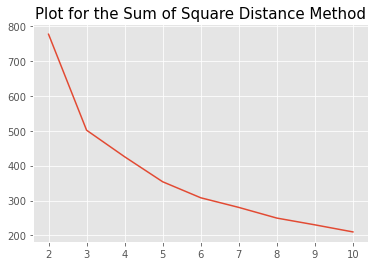

In [36]:
ssd = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df_countries)
    ssd.append([k, kmeans.inertia_])
SSD = pd.DataFrame(ssd, columns = ['k', 'SSD_values'])
print(SSD)

# Plotting the values of K vs SSD values
# --------------------------------------
plt.style.use('ggplot')
plt.plot(SSD['k'],
         SSD['SSD_values'])
plt.title("Plot for the Sum of Square Distance Method", fontsize=15)

### <font color='magenta'> 6.2) - The Silhouette Score Method

In [37]:
# Here we look at the maximum value of Silhoutte's Score
# Since 2 is the minimum number of clusters, we cannot take it.
# So we choose the next highest score for a corresponding cluster.

    k  silhouettes_score
0   2           0.499264
1   3           0.424558
2   4           0.370621
3   5           0.357447
4   6           0.302907
5   7           0.285351
6   8           0.303758
7   9           0.303044
8  10           0.237567




Text(0.5, 1.0, 'Plot for the Silhouette Score Method')

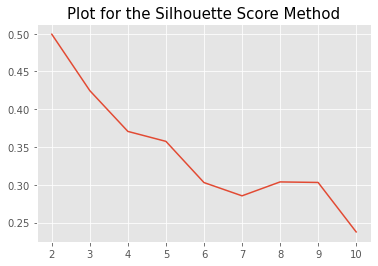

In [38]:
ss = []

for k in range(2,11):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_df_countries)
    ss.append([k, silhouette_score(scaled_df_countries, kmeans.labels_)])

sil_score = pd.DataFrame(ss, columns=['k', 'silhouettes_score'])
print(sil_score)
print('\n')

# Plotting the values of K vs Silhoutte Scores
# --------------------------------------------
plt.style.use('ggplot')
plt.plot(sil_score['k'],
         sil_score['silhouettes_score'])
plt.title("Plot for the Silhouette Score Method", fontsize=15)

In [39]:
# The SSD Method (Elbow-Curve Method) suggests the value of k = 3
# Whereas, the Silhouette's Method don't show much difference in the score 
# for K=3 abd K=4, i.e. 
# for K=3 --> Silhouette's score = 0.424558
# for K=4 --> Silhouette's score = 0.425873
# So, we select the value of k to be 3, as lesser the value, it will be simpler to deal with

#### <font color='red'> We will proceed with value of K=3

**************
## <font color = 'blue'> Step 7 - Model Building
**************

### <font color = 'magenta'> 7.1) - Method 1: K-Means Clustering with value of k=3
**************

#### 7.1.1) -  KMeans Clustering Model with K=3

In [40]:
# Final model with k=4
# --------------------

kmeans=KMeans(n_clusters=3,max_iter=500, random_state=0)                    # k=4 and iteration=500
# Why we chose random_state = 0 :

kmeans.fit(scaled_df_countries)                          # fitting the dataset
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2,
       2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1,
       2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 0, 0])

In [41]:
df_countries['kmeans_cluster_id'] = kmeans.labels_
df_countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [42]:
df_countries['kmeans_cluster_id'].value_counts()

2    84
0    45
1    28
Name: kmeans_cluster_id, dtype: int64

#### 7.1.2) - Visualize the clusters and performing cluster profiling (gdpp, child_mort, income)

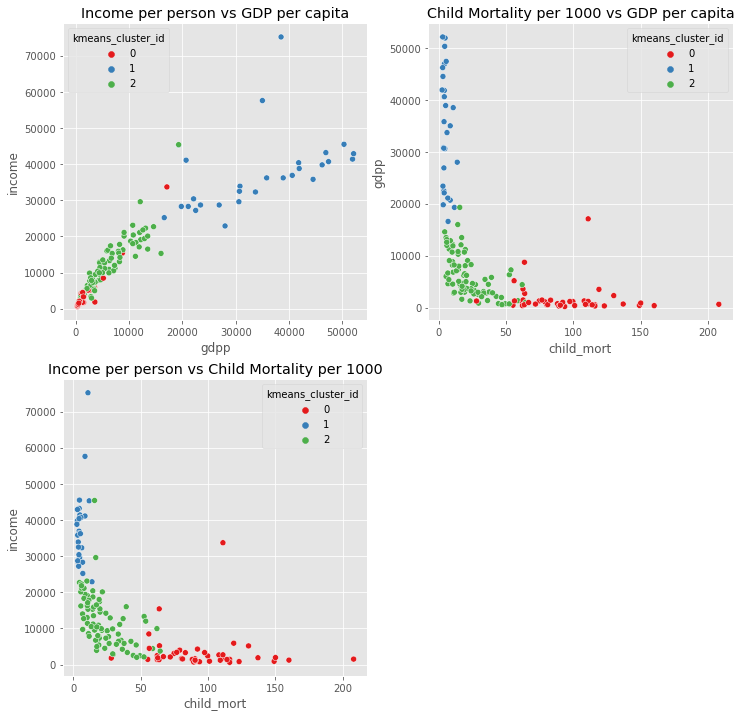

In [43]:
# Visualizing Clusters using Scatter-plot
# ---------------------------------------
plt.figure(figsize = (12,12))
plt.style.use('ggplot')

plt.subplot(2,2,1)
sns.scatterplot(df_countries['gdpp'], 
                df_countries['income'], 
                hue=df_countries['kmeans_cluster_id'],
                palette = 'Set1')
plt.title('Income per person vs GDP per capita')

plt.subplot(2,2,2)
sns.scatterplot(df_countries['child_mort'], 
                df_countries['gdpp'], 
                hue=df_countries['kmeans_cluster_id'],
                palette = 'Set1')
plt.title('Child Mortality per 1000 vs GDP per capita')

plt.subplot(2,2,3)
sns.scatterplot(df_countries['child_mort'], 
                df_countries['income'], 
                hue=df_countries['kmeans_cluster_id'],
                palette = 'Set1')
plt.title('Income per person vs Child Mortality per 1000')

plt.show()

In [44]:
# Observations
# ============
# - For the Income vs gdpp plot - We can observe that - 
#           -------------------
#     > cluster 0 have data points with generally low income and low gdpp
#     > cluster 1 have data points with generally medium income and medium gdpp
#     > cluster 2 have data points with generally high income and high gdpp

# - For the gdpp vs child_mort plot - we observe that - 
#           -----------------------
#     > cluster 0 have data points with generally low gdpp and high child mortality rate.
#     > cluster 1 have data points with generally low-medium gdpp and medium child mortality rate.
#     > cluster 2 have data points with generally high gdpp and low child mortality rate.

# - For the income vs child_mort plot - we observe that -
#           -------------------------
#     > cluster 0 have data points with generally low income and high child mortality rate.
#     > cluster 1 have data points with generally low-medium income and medium child mortality rate.
#     > cluster 2 have data points with generally high income and low child mortality rate.
# ------------------------------------------------------------------------------------------------------------

In [45]:
df_countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [46]:
# Grouping the Cluster_IDs by the means of the gdpp, income and child_mort
# ------------------------------------------------------------------------
df_countries[['gdpp','income','child_mort', 'kmeans_cluster_id']].groupby('kmeans_cluster_id').mean()

,gdpp,income,child_mort
kmeans_cluster_id,,,
0,1633.600000,3312.733333,94.537778
1,34214.285714,37321.428571,5.450000
2,6123.833333,11924.880952,22.992857


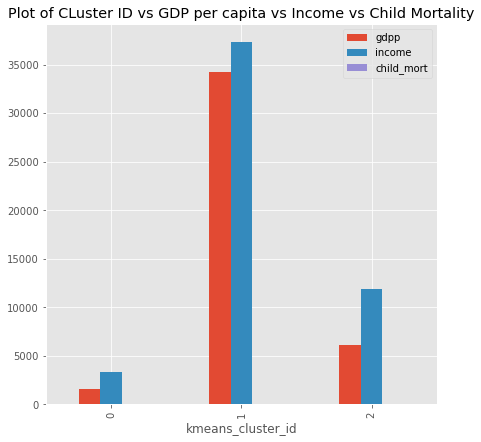

In [47]:
# Plotting the above data - Barplot
# ---------------------------------
df_countries[['gdpp',
              'income',
              'child_mort', 
              'kmeans_cluster_id']].groupby('kmeans_cluster_id').mean().plot(kind='bar', figsize=(7,7))
plt.title('Plot of CLuster ID vs GDP per capita vs Income vs Child Mortality')
plt.show()


In [48]:
# From the above bar plot, we cannot clearly observe the role of child_mort in identifying the clusters.
# Thus we will plot a BOXPLOT for the same.

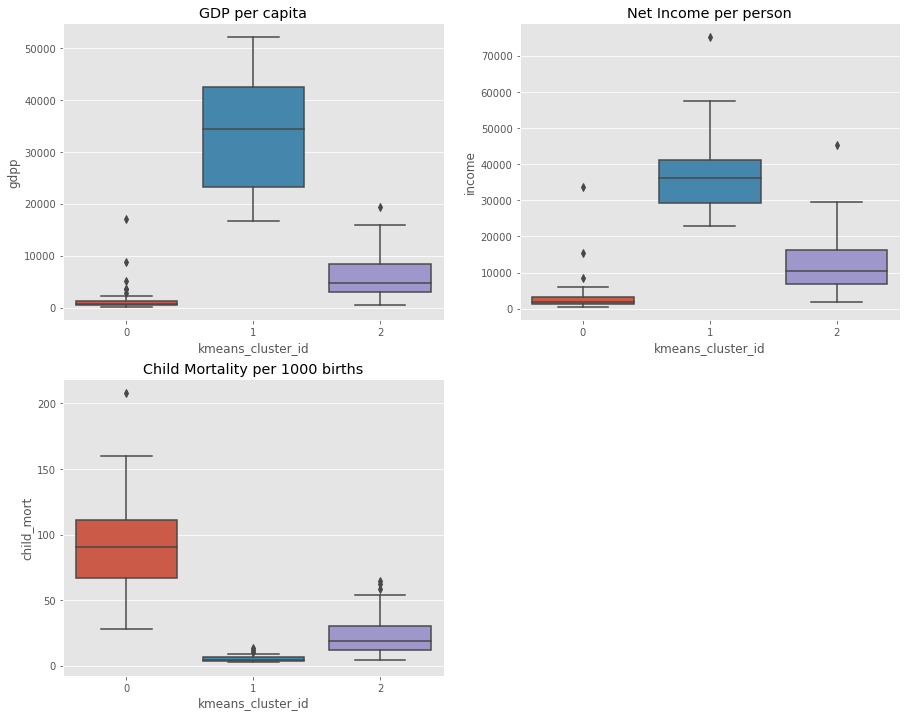

In [49]:
# Visualizing Clusters using Box-plot
# -----------------------------------

plt.figure(figsize = (15,12))
plt.title('Hello')

plt.subplot(2,2,1)
sns.boxplot(x='kmeans_cluster_id', y='gdpp', data=df_countries)
plt.title('GDP per capita')

plt.subplot(2,2,2)
sns.boxplot(x='kmeans_cluster_id', y='income', data=df_countries)
plt.title('Net Income per person')

plt.subplot(2,2,3)
sns.boxplot(x='kmeans_cluster_id', y='child_mort', data=df_countries)
plt.title('Child Mortality per 1000 births')

plt.show()

In [50]:
# Observations/Conclusion/Inferences
# ----------------------------------
# From the above 3 boxplots we can conclude that - 
#
# Cluster 0 - Very high child mortality rate, very low GDP per capita, very low net income per individual
# ------------------------------
# Cluster 1 - Medium child mortality rate, medium GDP per capita, medium net income per individual
# ------------------------------
# Cluster 2 - Very low child mortality rate, very high GDP per capita, very high net income per individual
# ------------------------------

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# ----------- The cluster that we require is the Cluster Number = 0 -----------
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [51]:
df_countries_cluster_0_kmeans = df_countries[df_countries['kmeans_cluster_id']==0]
df_countries_cluster_0_kmeans.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id
country,,,,,,,,,,
Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0
Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0
Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0
Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0


In [52]:
print("Size of the cluster - ",df_countries_cluster_0_kmeans.shape[0])

Size of the cluster -  45


In [53]:
# Sorting the top 10 countries with low gdp and income, but high child mortality rate
# -----------------------------------------------------------------------------------
sorted_country_list_1 = df_countries_cluster_0_kmeans.sort_values(by = ['gdpp', 'child_mort', 'income'], 
                                   ascending = [True, False, True])
sorted_country_list_1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id
country,,,,,,,,,,
Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0
Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327,0
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0
Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,0
Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,0
Madagascar,62.2,103.2500,15.5701,177.590,1390,8.790,60.8,4.60,413,0
Mozambique,101.0,131.9850,21.8299,193.578,918,7.640,54.5,5.56,419,0
Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0
Malawi,90.5,104.6520,30.2481,160.191,1030,12.100,53.1,5.31,459,0


In [54]:
# Resetting the index of the dataset - 
# ----------------------------------
sorted_country_list_1.reset_index(inplace=True)

In [55]:
# Making the list of countries in direst need of aid
# --------------------------------------------------
final_countries_list_1 = list(sorted_country_list_1['country'])
for i in range(0, len(final_countries_list_1)):
    print('{} - {}'.format(i+1, final_countries_list_1[i]))

1 - Burundi
2 - Liberia
3 - Congo, Dem. Rep.
4 - Niger
5 - Sierra Leone
6 - Madagascar
7 - Mozambique
8 - Central African Republic
9 - Malawi
10 - Eritrea
11 - Togo
12 - Guinea-Bissau
13 - Afghanistan
14 - Gambia
15 - Rwanda
16 - Burkina Faso
17 - Uganda
18 - Guinea
19 - Haiti
20 - Tanzania
21 - Mali
22 - Benin
23 - Comoros
24 - Chad
25 - Kenya
26 - Senegal
27 - Pakistan
28 - Lao
29 - Lesotho
30 - Mauritania
31 - Cote d'Ivoire
32 - Solomon Islands
33 - Cameroon
34 - Ghana
35 - Yemen
36 - Zambia
37 - Sudan
38 - Kiribati
39 - Nigeria
40 - Congo, Rep.
41 - Angola
42 - Timor-Leste
43 - Namibia
44 - Gabon
45 - Equatorial Guinea


### <font color='brown'> ***Result of the K-Means Clustering Method***
*************
We selected the cluster with countries having - 
- High Child Mortality Rate per 1000 births.
- Low Net Income per individual.
- Low GDP per capita.
    
The cluster we selected had a total of 45 countries. <br> 
**The order of countries in which the CEO needs to consider for providing aid are** - <br>
1 - Burundi<br> 
2 - Liberia<br> 
3 - Congo, Dem. Rep.<br> 
4 - Niger<br> 
5 - Sierra Leone<br> 
6 - Madagascar<br> 
7 - Mozambique<br> 
8 - Central African Republic<br> 
9 - Malawi<br> 
10 - Eritrea<br> 
11 - Togo<br> 
12 - Guinea-Bissau<br> 
13 - Afghanistan<br> 
14 - Gambia<br> 
15 - Rwanda<br> 
16 - Burkina Faso<br> 
17 - Uganda<br> 
18 - Guinea<br> 
19 - Haiti<br> 
20 - Tanzania<br> 
21 - Mali<br> 
22 - Benin<br> 
23 - Comoros<br> 
24 - Chad<br> 
25 - Kenya<br> 
26 - Senegal<br> 
27 - Pakistan<br> 
28 - Lao<br> 
29 - Lesotho<br> 
30 - Mauritania<br> 
31 - Cote d'Ivoire<br> 
32 - Solomon Islands<br> 
33 - Cameroon<br> 
34 - Ghana<br> 
35 - Yemen<br> 
36 - Zambia<br> 
37 - Sudan<br> 
38 - Kiribati<br> 
39 - Nigeria<br> 
40 - Congo, Rep.<br> 
41 - Angola<br> 
42 - Timor-Leste<br> 
43 - Namibia<br> 
44 - Gabon<br> 
45 - Equatorial Guinea<br> 


In [56]:
# ----------------------------------------------------------------------------------------------------------------

******************
### <font color = 'magenta'> 7.2) - Method 2 - Hierarchical Clustering
**************

#### 7.2.1) - Hierarchical Clustering with Single Linkage

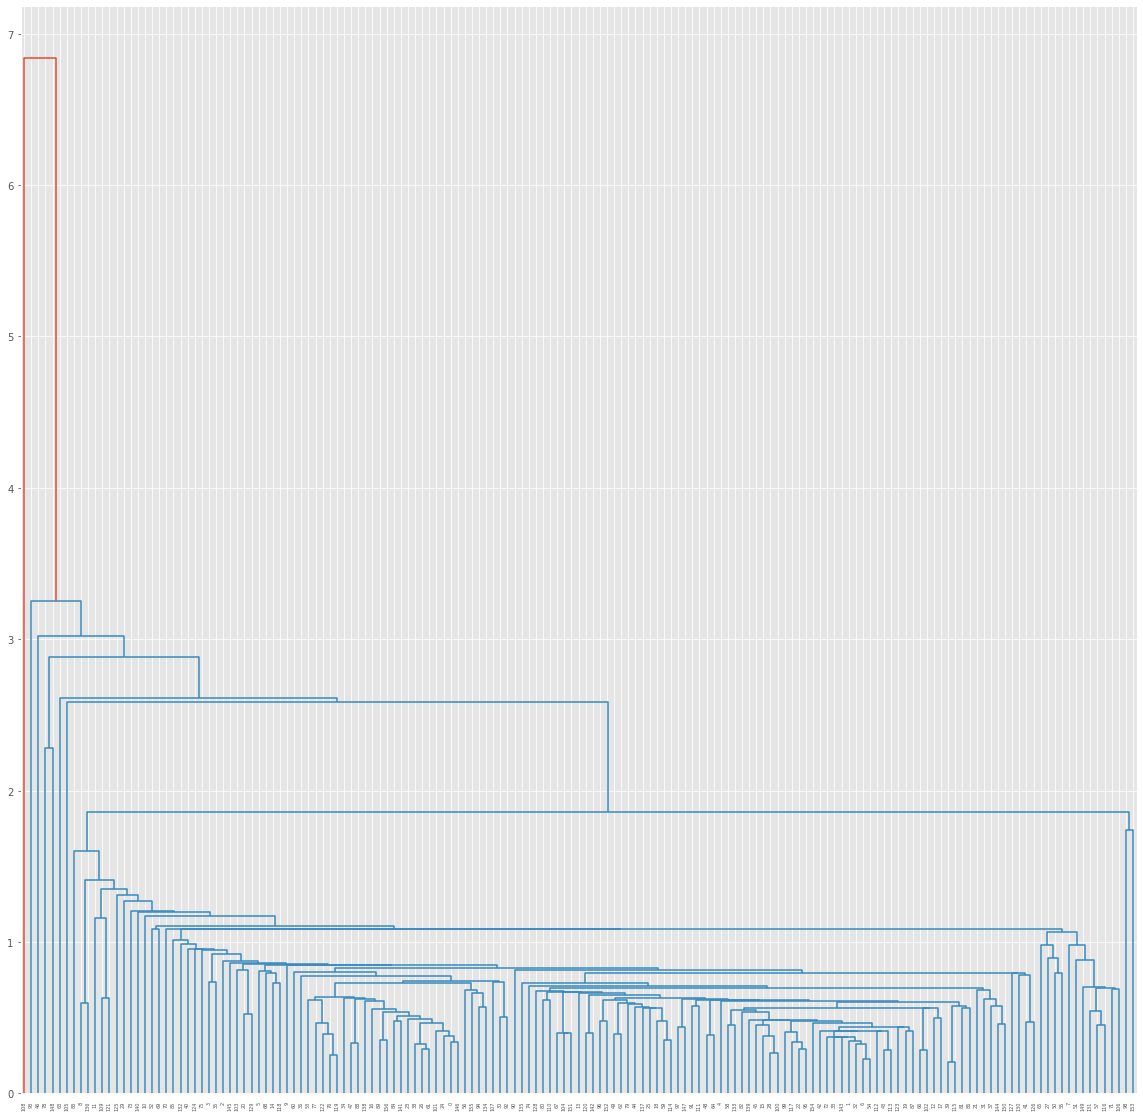

In [57]:
# Hierarchical Clustering with Single Linkage
# -------------------------------------------
plt.figure(figsize=(20,20))
plt.style.use('ggplot')
mergings = linkage(scaled_df_countries, 
                   method="single", 
                   metric='euclidean')

dendrogram(mergings)
plt.show()

In [58]:
# We observe that with Single Linkage Hierarchical clustering for this problem, 
# we get many clusters with only a single data point, making this method un-reliable and inefficient.

# Thus we move on to Complete Linkage Hierarchical Clustering.

#### 7.2.2) - Hierarchical Clustering with Complete Linkage

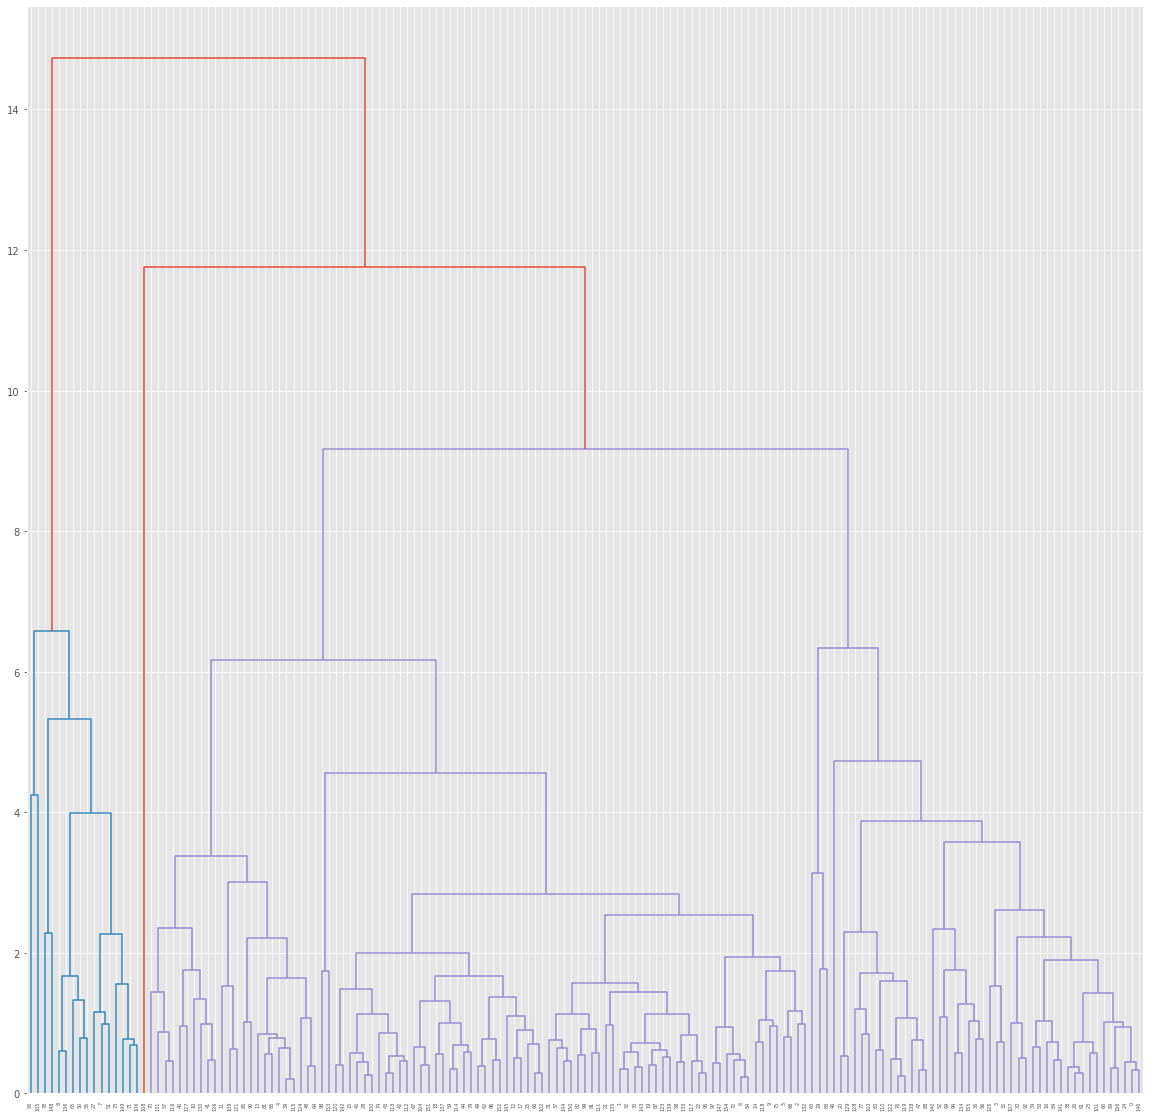

In [59]:
# Hierarchical Clustering with Complete Linkage
# ---------------------------------------------

plt.figure(figsize=(20,20))
plt.style.use('ggplot')
mergings = linkage(scaled_df_countries, 
                   method="complete", 
                   metric='euclidean')

dendrogram(mergings)
plt.show()

In [60]:
# On observation of the dendrograms for the Complete Linkage Hierarchical Clustering, we observe that
# The clusters here are much better distributed.

#### 7.2.3) - Cutting the Dendrograms

##### <font color = 'red'> For Hierarchical Clustering method, let us cut the Dendrograms at both types of clusters </font>
##### <font color = 'darkpink'> 1 - Number of Clusters = 3</font>
##### <font color = 'darkpink'> 2 - Number of Clusters = 4</font> 

In [61]:
# We are doing this because the Silhoutte's Score for number clusters = 3 and number of clusters = 4 was nearly equal.
# We also used a little intuition for doing this, taking a hint from the dendrogram.

##### <font color = 'darkpink'> 1 - Cutting the Dendrogram at 3 clusters </font>

In [62]:
# Cutting the Dendrogram at 3 clusters
# ------------------------------------
cluster_labels_array = cut_tree(mergings, 
                                n_clusters=3).reshape(-1, )

print('Hierarchical Cluster Array: ')
print(cluster_labels_array)
print('\n')


# assign cluster labels
# ---------------------
df_countries['hierarchical_cluster_id_3'] = cluster_labels_array
df_countries.head()

Hierarchical Cluster Array: 
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0]




,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id,hierarchical_cluster_id_3
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,0
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,0
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,0


In [63]:
# Counting the number of data points in each cluster
# --------------------------------------------------
df_countries.hierarchical_cluster_id_3.value_counts()

0    140
1     16
2      1
Name: hierarchical_cluster_id_3, dtype: int64

In [64]:
# We see that the number of data points distributed in the clusters is uneven not optimal.
# Let's Visualize this further using Scatterplots and Boxplots.

##### 7.2.3.1) - Visualize the clusters and performing cluster profiling (gdpp, child_mort, income)

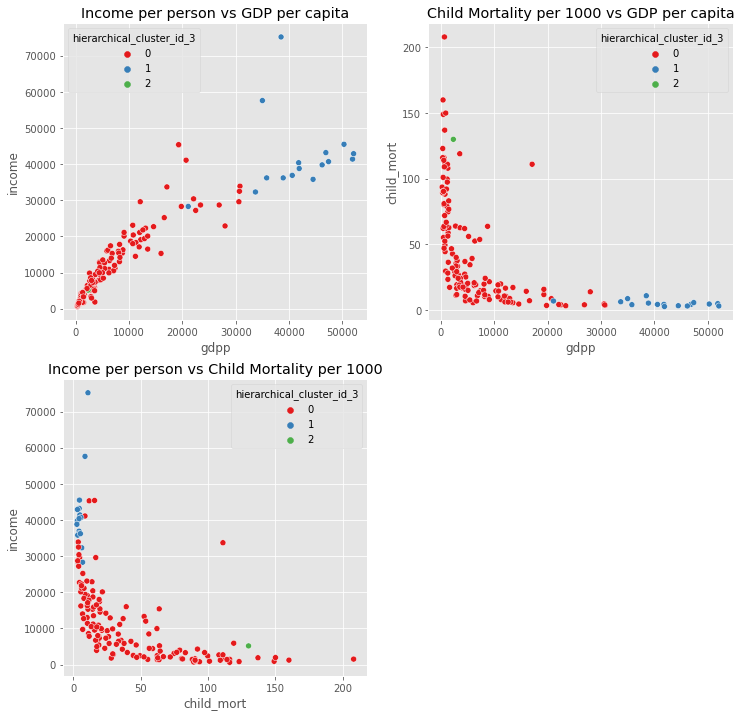

In [65]:
# Visualizing Clusters using Scatter-plot
# ---------------------------------------
plt.figure(figsize = (12,12))
plt.style.use('ggplot')

plt.subplot(2,2,1)
sns.scatterplot(df_countries['gdpp'], 
                df_countries['income'], 
                hue=df_countries['hierarchical_cluster_id_3'],
                palette = 'Set1')
plt.title('Income per person vs GDP per capita')

plt.subplot(2,2,2)
sns.scatterplot(df_countries['gdpp'], 
                df_countries['child_mort'], 
                hue=df_countries['hierarchical_cluster_id_3'],
                palette = 'Set1')
plt.title('Child Mortality per 1000 vs GDP per capita')

plt.subplot(2,2,3)
sns.scatterplot(df_countries['child_mort'], 
                df_countries['income'], 
                hue=df_countries['hierarchical_cluster_id_3'],
                palette = 'Set1')
plt.title('Income per person vs Child Mortality per 1000')

plt.show()

In [66]:
# Observations
# ============
# - For the Income vs gdpp plot - We can observe that - 
#           -------------------
#     > cluster 0 have data points with low to medium income and low to medium gdpp
#     > cluster 1 have data points with generally high income and high gdpp
#     > cluster 2 have only 1 data point with low income and low gdpp
#
# - For the gdpp vs child_mort plot - we observe that - 
#           -----------------------
#     > cluster 0 have data points with low to medium gdpp and low to high child mortality rate.
#     > cluster 1 have data points with generally high gdpp and low child mortality rate.
#     > cluster 2 have only 1 data point with low gdpp and high child mortality rate
# 
# - For the income vs child_mort plot - we observe that -
#           -------------------------
#     > cluster 0 have data points with low to medium income and low to high child mortality rate.
#     > cluster 1 have data points with generally high income and low child mortality rate.
#     > cluster 2 have only 1 data point with low income and high child mortality rate.
# ------------------------------------------------------------------------------------------------------------

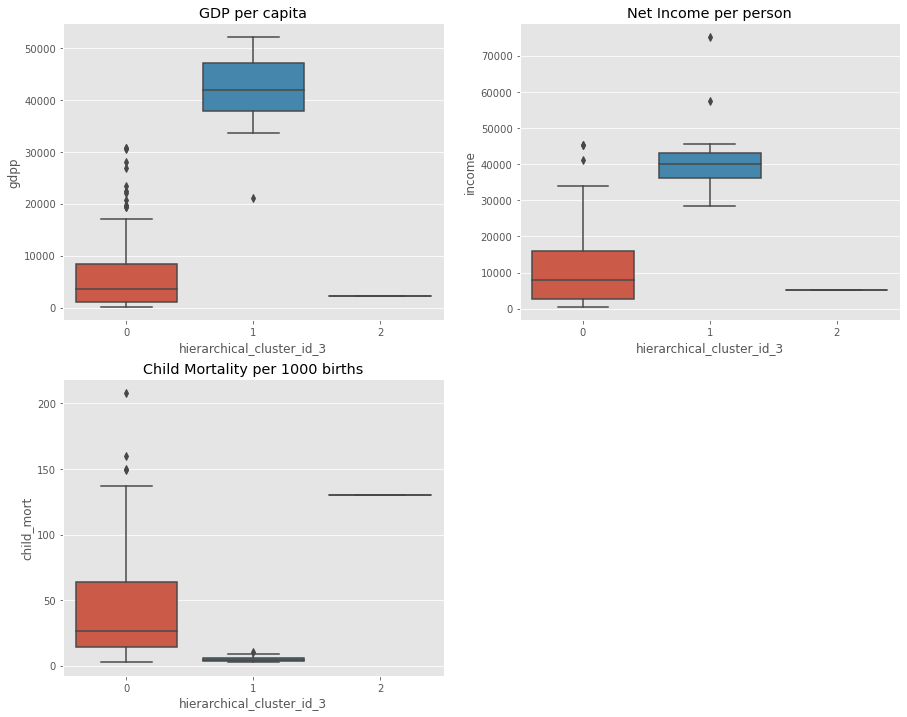

In [67]:
# Visualizing Clusters using Boxplots
# -----------------------------------
plt.figure(figsize = (15,12))
plt.style.use('ggplot')

plt.subplot(2,2,1)
sns.boxplot(x='hierarchical_cluster_id_3', y='gdpp', data=df_countries)
plt.title('GDP per capita')

plt.subplot(2,2,2)
sns.boxplot(x='hierarchical_cluster_id_3', y='income', data=df_countries)
plt.title('Net Income per person')

plt.subplot(2,2,3)
sns.boxplot(x='hierarchical_cluster_id_3', y='child_mort', data=df_countries)
plt.title('Child Mortality per 1000 births')

plt.show()

In [68]:
# Observations:
# ------------
# We can observe that the cluster 0 and cluster 2 are behaving similarly, while cluster 1 is entirely different.
# But on comparing cluster 0 with cluster 2 and 1, we see that - 
# > Cluster 0 have a lower gdpp than cluster 2  when comparing the total data.
# > Cluster 0 have a lower income than than cluster 2 when comparing the total data.
# > CLuster 0 have a higher child mortality rate than cluster 2 when comparing the total data.

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# ----------- The cluster that we require is the Cluster Number = 0 -----------
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [69]:
# The issue with cutting the dendrogram at cluster size = 3 is that, 
#   the number of data points in this cluster which are 140 are extremely high.
# Thus, to improve this we use cluster size of 4 to cut the dendrogram.
# Let's see if we get much better clusters.

In [70]:
# -----------------------------------------------------------------------------------------------------------------

##### <font color = 'darkpink'> 2 - Cutting the Dendrogram at 4 clusters </font>

In [71]:
# Cutting the Dendogram at 4 clusters.
# -----------------------------------
cluster_labels_array_4 = cut_tree(mergings, 
                                  n_clusters=4).reshape(-1, )
print('Hierarchical Cluster Array: ')
print(cluster_labels_array_4)
print('\n')

# assign cluster labels
# ---------------------
df_countries['hierarchical_cluster_id_4'] = cluster_labels_array_4
df_countries.head()

Hierarchical Cluster Array: 
[0 1 1 0 1 1 1 2 2 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 2 1 0 0 1 1 1 0 0 0
 1 0 1 1 1 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 1 1 1 0 0 1 0 1 2 1 1 1 0 1 2 1 2
 1 1 0 0 2 1 0 1 1 0 0 1 1 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2 2 0 3 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 2 1 0 1 0 0 1 1 1 1 0 1
 2 2 1 1 1 1 1 0 0]




,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id,hierarchical_cluster_id_3,hierarchical_cluster_id_4
country,,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,0,1
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,0,1
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,0,1


In [72]:
df_countries['hierarchical_cluster_id_4'].value_counts()

1    93
0    47
2    16
3     1
Name: hierarchical_cluster_id_4, dtype: int64

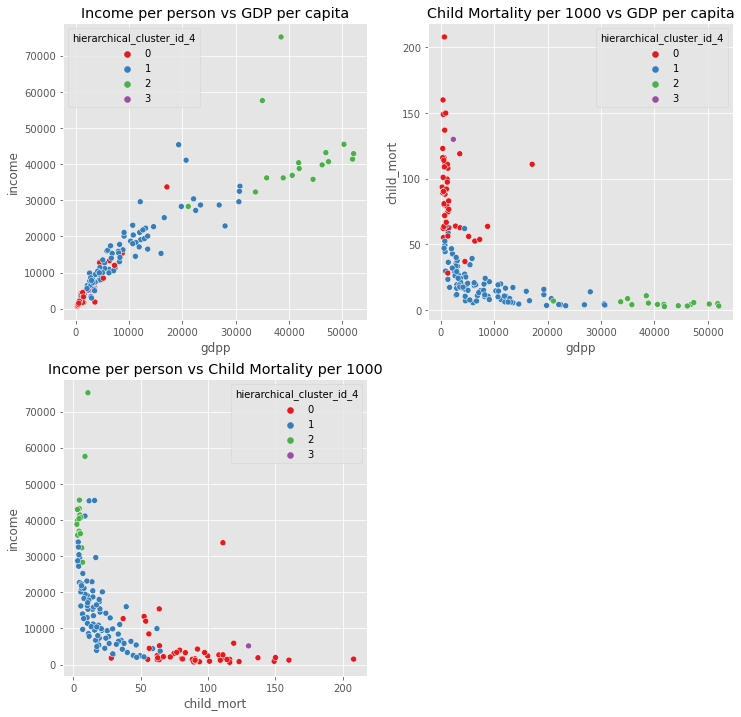

In [73]:
# Visualizing Clusters using Scatter-plot
# ---------------------------------------
plt.figure(figsize = (12,12))
plt.style.use('ggplot')

plt.subplot(2,2,1)
sns.scatterplot(df_countries['gdpp'], 
                df_countries['income'], 
                hue=df_countries['hierarchical_cluster_id_4'],
                palette = 'Set1')
plt.title('Income per person vs GDP per capita')

plt.subplot(2,2,2)
sns.scatterplot(df_countries['gdpp'], 
                df_countries['child_mort'], 
                hue=df_countries['hierarchical_cluster_id_4'],
                palette = 'Set1')
plt.title('Child Mortality per 1000 vs GDP per capita')

plt.subplot(2,2,3)
sns.scatterplot(df_countries['child_mort'], 
                df_countries['income'], 
                hue=df_countries['hierarchical_cluster_id_4'],
                palette = 'Set1')
plt.title('Income per person vs Child Mortality per 1000')

plt.show()

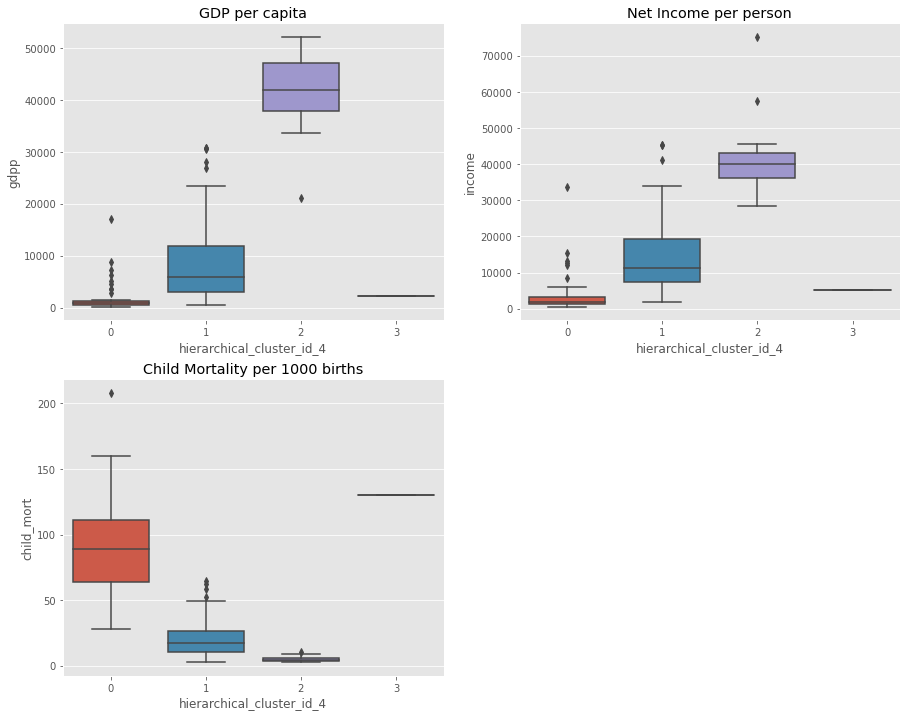

In [74]:
# Visualizing Clusters using Boxplots
# -----------------------------------
plt.figure(figsize = (15,12))
plt.title('Hello')

plt.subplot(2,2,1)
sns.boxplot(x='hierarchical_cluster_id_4', y='gdpp', data=df_countries)
plt.title('GDP per capita')

plt.subplot(2,2,2)
sns.boxplot(x='hierarchical_cluster_id_4', y='income', data=df_countries)
plt.title('Net Income per person')

plt.subplot(2,2,3)
sns.boxplot(x='hierarchical_cluster_id_4', y='child_mort', data=df_countries)
plt.title('Child Mortality per 1000 births')

plt.show()

In [75]:
# From the Above Scatter plot and Boxplot we observe that - 
#  Cluster 0 - Low gdpp, Low income, High Child Mortality rate.
#  Cluster 1 - Medium gdpp, Medium income and low to medium child mortality rate.
#  Cluster 2 - High gdpp, High income, and very low child mortality rate.
#  Cluster 3 - Low gdpp, Low income, High Child Mortality rate

In [76]:
# Here we see that cluster 0 and cluster 3 are nearly similar.
# But on comparing cluster 0 with cluster 3, we see that - 
# > Cluster 0 have a lower gdpp than cluster 3 when comparing the total data.
# > Cluster 0 have a lower income than than cluster 3 when comparing the total data.
# > CLuster 0 have a higher child mortality rate than cluster 3 when comparing the total data.

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# ----------- The cluster that we require is the Cluster Number = 0 -----------
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [77]:
# Thus we get a more optimal cluster distribution with cutting the dendrogram at 4 clusters.

In [78]:
# So we can drop the Hierarchical cluster IDs from our dataset where the dendrogram was cut at 3 clusters

df_countries.drop('hierarchical_cluster_id_3', axis=1, inplace=True)

In [79]:
df_countries_cluster_0_HC = df_countries[df_countries['hierarchical_cluster_id_4']==0]
df_countries_cluster_0_HC.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id,hierarchical_cluster_id_4
country,,,,,,,,,,,
Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,0,0
Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0,0
Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,0,0
Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,2,0
Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,0,0


In [80]:
df_countries_cluster_0_HC.shape

(47, 11)

In [81]:
# Sorting the top 10 countries with low gdp and income, but high child mortality rate
# -----------------------------------------------------------------------------------
sorted_countries_list_2 = df_countries_cluster_0_HC.sort_values(by = ['gdpp', 'child_mort', 'income'],
                                      ascending = [True, False, True])
sorted_countries_list_2.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id,hierarchical_cluster_id_4
country,,,,,,,,,,,
Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0,0
Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0,0
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0,0
Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0,0
Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0,0
Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0,0
Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0,0
Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0,0
Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0,0


In [82]:
# Sorting the countries
# ---------------------
sorted_countries_list_2.reset_index(inplace=True)

In [83]:
sorted_countries_list_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id,hierarchical_cluster_id_4
0,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0,0
1,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0,0
2,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0,0
3,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0,0
4,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0,0


In [84]:
# Printing the countries who are in requirement of aid
# ----------------------------------------------------
final_countries_list_2 = list(sorted_countries_list_2.country)
for i in range(0, len(final_countries_list_2)):
    print('{} - {}'.format(i+1, final_countries_list_2[i]))

1 - Burundi
2 - Liberia
3 - Congo, Dem. Rep.
4 - Niger
5 - Sierra Leone
6 - Madagascar
7 - Mozambique
8 - Central African Republic
9 - Malawi
10 - Eritrea
11 - Togo
12 - Guinea-Bissau
13 - Afghanistan
14 - Gambia
15 - Rwanda
16 - Burkina Faso
17 - Uganda
18 - Guinea
19 - Haiti
20 - Tanzania
21 - Mali
22 - Benin
23 - Comoros
24 - Chad
25 - Kenya
26 - Senegal
27 - Pakistan
28 - Lao
29 - Lesotho
30 - Mauritania
31 - Cote d'Ivoire
32 - Solomon Islands
33 - Cameroon
34 - Ghana
35 - Yemen
36 - Zambia
37 - Sudan
38 - Kiribati
39 - Congo, Rep.
40 - Angola
41 - Timor-Leste
42 - Iraq
43 - Namibia
44 - Botswana
45 - South Africa
46 - Gabon
47 - Equatorial Guinea


### <font color='brown'> ***Result of the Hierarchical Clustering Method***
*************
We selected the cluster with countries having - 
- High Child Mortality Rate per 1000 births.
- Low Net Income per individual.
- Low GDP per capita.
    
Here we selected number of clusters = 4.
    
The cluster we selected had a total of 47 countries. <br> 
**The order of countries in which the CEO needs to consider for providing aid are** - <br>
1 - Burundi<br>
2 - Liberia<br>
3 - Congo, Dem. Rep.<br>
4 - Niger<br>
5 - Sierra Leone<br>
6 - Madagascar<br>
7 - Mozambique<br>
8 - Central African Republic<br>
9 - Malawi<br>
10 - Eritrea<br>
11 - Togo<br>
12 - Guinea-Bissau<br>
13 - Afghanistan<br>
14 - Gambia<br>
15 - Rwanda<br>
16 - Burkina Faso<br>
17 - Uganda<br>
18 - Guinea<br>
19 - Haiti<br>
20 - Tanzania<br>
21 - Mali<br>
22 - Benin<br>
23 - Comoros<br>
24 - Chad<br>
25 - Kenya<br>
26 - Senegal<br>
27 - Pakistan<br>
28 - Lao<br>
29 - Lesotho<br>
30 - Mauritania<br>
31 - Cote d'Ivoire<br>
32 - Solomon Islands<br>
33 - Cameroon<br>
34 - Ghana<br>
35 - Yemen<br>
36 - Zambia<br>
37 - Sudan<br>
38 - Kiribati<br>
39 - Congo, Rep.<br>
40 - Angola<br>
41 - Timor-Leste<br>
42 - Iraq<br>
43 - Namibia<br>
44 - Botswana<br>
45 - South Africa<br>
46 - Gabon<br>
47 - Equatorial Guinea<br>

**************************
## <font color = 'blue'> Step 7 - Final Result and Conclusion
**********************

We see that both the methods - K-Means Clustering and Hierarchical Clustering gives identical results. We found that K-Means generated a cluster of 45 countries and Hierarchical generated a cluster of 47 countries. So we can say that both the algorithms gave optimal results, although we had to take 3 clusters in K-means compared to 4 clusters in Hierarchical clustering. Both the choice of choosing number of clusters were verified using Silhouette's Score and not much difference was observed in choosing 3 clusters or 4 clusters.

We can now suggest the CEO of HELP International that the top 20 countries that are in dire need of aid are - <br>
1 - Burundi<br>
2 - Liberia<br>
3 - Congo, Dem. Rep.<br>
4 - Niger<br>
5 - Sierra Leone<br>
6 - Madagascar<br>
7 - Mozambique<br>
8 - Central African Republic<br>
9 - Malawi<br>
10 - Eritrea<br>
11 - Togo<br>
12 - Guinea-Bissau<br>
13 - Afghanistan<br>
14 - Gambia<br>
15 - Rwanda<br>
16 - Burkina Faso<br>
17 - Uganda<br>
18 - Guinea<br>
19 - Haiti<br>
20 - Tanzania<br>

---------------------------------------------------------------------------------------------------------------------